In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics

In [49]:
lm22 = pd.read_csv('../summary_data/CombinedLM22.tsv', sep = '\t')
lm22.head()

,accession,geo,type,Survivor,age,sex,score_type,severity_score,B_cells,B_cells_naive,...,Macrophages,Macrophages_M0,Macrophages_M1,Macrophages_M2,Dendritic_cells_resting,Dendritic_cells_activated,Mast_cells_resting,Mast_cells_activated,Eosinophils,Neutrophils
0,E-MEXP-3567,X104,training,0,0.5,0.0,NaN,NaN,0.13104,0.06322,...,0.10335,0.09282,0.0,0.01053,0.0,0.0,0.0,0.0,0.0,0.31637
1,E-MEXP-3567,X105,training,0,0.5,0.0,NaN,NaN,0.15410,0.08319,...,0.25630,0.25630,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.24822
2,E-MEXP-3567,X109,training,0,0.5,1.0,NaN,NaN,0.13124,0.08426,...,0.21885,0.21885,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.24536
3,E-MEXP-3567,X115,training,1,0.5,0.0,NaN,NaN,0.15521,0.06117,...,0.11886,0.11886,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.32486
4,E-MEXP-3567,X121,training,1,0.5,1.0,NaN,NaN,0.07203,0.05966,...,0.27913,0.27913,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.31262


In [50]:
X = lm22[['T_cells', 'Macrophages','B_cells','Plasma_cells','NK_cells','Monocytes','Eosinophils','Neutrophils']]
y = lm22['Survivor']

In [51]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)


In [52]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)

y_pred=logistic_regression.predict(X_test)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [53]:
logistic_regression.coef_

array([[-0.39672282,  0.50071577, -0.11800917, -0.19027361,  0.17572626,
        -0.27167269,  0.07017741, -1.12691358]])

In [54]:
logistic_regression.intercept_

array([-0.67310699])

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88       232
           1       0.00      0.00      0.00        64

    accuracy                           0.78       296
   macro avg       0.39      0.50      0.44       296
weighted avg       0.61      0.78      0.69       296



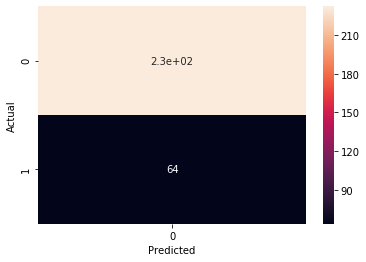

In [58]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

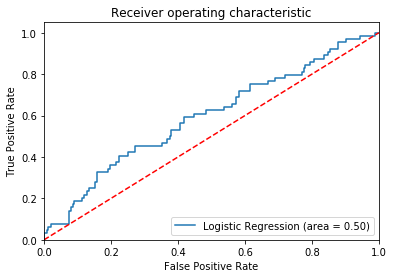

In [59]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logistic_regression.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [60]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.7837837837837838


In [50]:
new_candidates = {'gmat': [590,740,680,610,710],
                  'gpa': [2,3.7,3.3,2.3,3],
                  'work_experience': [3,4,6,1,5]
                  }

df2 = pd.DataFrame(new_candidates,columns= ['gmat', 'gpa','work_experience'])
y_pred=logistic_regression.predict(df2)

In [51]:
print (df2)
print (y_pred)

   gmat  gpa  work_experience
0   590  2.0                3
1   740  3.7                4
2   680  3.3                6
3   610  2.3                1
4   710  3.0                5
[0 1 1 0 1]
